# Engenharia de Atributos em Dados Médicos 

### Contexto:
As   readmissões   hospitalares (quando   um   paciente   recebe   alta   mas   é   internado novamente pouco tempo depois) são caras e refletem as inadequações no sistema de saúde.

A readmissão hospitalar é uma das principais preocupações no tratamento do diabetes, com milhões de dólares sendo gastos no tratamento de pacientes diabéticos que precisam ser readmitidos em um hospital após receberem alta.


### Definição do Problema:
Identificar  os  pacientes  diabéticos  de  alto  risco  por  meio  de estratificação de risco de registros médicos eletrônicos, para baixar as readmissões de pacientes de diabetes.

### Fonte de Dados: 
http://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008Os 


### Instalando e Carregando os Pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os Dados e Compreendendo as Variáveis

In [2]:
dados = pd.read_csv('dados/diabetic_data.csv')

In [3]:
dados.shape

(101766, 50)

In [4]:
# Visualizando os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Limpeza e Transformação dos Dados

In [6]:
dados.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [7]:
# Checando as colunas que tem valor = '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [8]:
# Verificando valores únicos
for col in list(dados.columns):
    
    # Obtém uma lista de valores únicos
    list_of_unique_values = dados[col].unique()
    
    # Se o número de valores exclusivos for menor de 15, imprima os valores.
    # Se não, imprima o número de valores exclusivos
    if len(list_of_unique_values) < 15:
        print('\n')
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print('\n')
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos
[0 5 1 6 2 3 4]


num_medications: 75 valores únicos


number_outpatient: 39 valores únicos


number_emergency: 33 valores únicos


number_inpati

- O caracter '?' nada mais é do que valor ausente. 

In [9]:
# Verificar a quantidade de registros com valor igual a '?'
quantidade = dados[dados == '?'].count().sum()

print("Quantidade de registros com valor igual a '?':", quantidade)


Quantidade de registros com valor igual a '?': 192849


In [10]:
# Verificar a quantidade e percentual de registros onde o valor é igual a '?'
for col in dados.columns:
    if dados[col].dtype == object and '?' in dados[col].values:
        quantidade = dados[col][dados[col] == '?'].count()
        percentual = quantidade / len(dados.index) * 100

        print('\nColuna', col, 'tem', quantidade, 'valores com o caractere "?"')
        print('Isso representa', round(percentual, 2), '% do total')


Coluna race tem 2273 valores com o caractere "?"
Isso representa 2.23 % do total

Coluna weight tem 98569 valores com o caractere "?"
Isso representa 96.86 % do total

Coluna payer_code tem 40256 valores com o caractere "?"
Isso representa 39.56 % do total

Coluna medical_specialty tem 49949 valores com o caractere "?"
Isso representa 49.08 % do total

Coluna diag_1 tem 21 valores com o caractere "?"
Isso representa 0.02 % do total

Coluna diag_2 tem 358 valores com o caractere "?"
Isso representa 0.35 % do total

Coluna diag_3 tem 1423 valores com o caractere "?"
Isso representa 1.4 % do total


In [11]:
# Quantidade de valores 'Unknown/Invalid' dentro da coluna 'gender'
dados['gender'][dados['gender']=='Unknown/Invalid'].count()

3

**PROBLEMAS COM VALORES AUSENTES:**

- Falta os dados sobre peso do paciente em mais de 96% dos registros. 

- O código do pagador e a especialidade médica também apresentam valores ausentes de 40 a 50%. 

- As demais variáveis apresentam um baixo percentual de valores ausentes.



**DECISÃO**

- 1- Devido à fraca interpretabilidade dos valores ausentes da variável peso, o melhor é simplesmente ignorar a variável e removê-la.

- 2- Vamos descartar as variáveis payer_code e medical_specialty, pois seria difícil tratar quantidade muito grande de valores ausentes.

- 3- Vamos remover os registros com "?" das demais variáveis.

- 4- Para a variável gender vamos remover os 3 registros com categoria "Unknown/Invalid".

In [12]:
# Removendo as 3 colunas com alto percentual de valores ausentes
dados = dados.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

In [13]:
# Removemos os registros com baixo percentual de valores ausentes
dados = dados[dados['race'] != '?']
dados = dados[dados['diag_1'] != '?']
dados = dados[dados['diag_2'] != '?']
dados = dados[dados['diag_3'] != '?']
dados = dados[dados['gender'] != 'Unknown/Invalid']

In [14]:
# Checando as colunas que tem valor = '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [15]:
dados.shape

(98052, 47)

In [16]:
# Checando por variáveis com um único valor
dados.loc[:, dados.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


In [17]:
# Removendoo variáveis com valores únicos
dados = dados.drop(['examide', 'citoglipton', 'metformin-rosiglitazone'], axis=1)

In [18]:
dados.shape


(98052, 44)

## Engenharia de Atributos

### Ajustando a Variável Alvo Para Estratificação de Risco
**Variável: readmitted**

Uma readmissão hospitalar ocorre quando um paciente que recebe alta do hospital é readmitido novamente dentro de um certo período de tempo. As taxas de readmissão hospitalar para certas condições agora são consideradas um indicador da qualidade do hospital e também afetam negativamente o custo médico. 

Nossa variável alvo é 'readmiited'. Queremos saber se um paciente será readmitido no hospital ou não.

A variável possui os valores:

-- < 30 (readmissão em menos de 30 dias)

-- > 30 (readmissão em mais de 30 dias)

-- No   (sem readmissão)

Nós podemos combinar a readmissão antes de 30 dias e após 30 dias em uma categoria (valor 1 - classe positiva) e nenhuma readmissão em outra categoria (valor 0 - classe negativa) para tornar nosso problema classificação binária.

In [19]:
dados['readmitted'].value_counts()

NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [20]:
#riar uma cópia do dataset até aqui
dados_clean1 = dados

In [21]:
# Ajustando a variável alvo

# '0' significa que não foi readmitido
# '1' significa que foi readmitido, não importa quantos dias após a alta
dados['readmitted'] = dados['readmitted'].replace('>30', 1)
dados['readmitted'] = dados['readmitted'].replace('<30', 1)
dados['readmitted'] = dados['readmitted'].replace('NO', 0)

In [22]:
# Verificando os valores únicos
dados['readmitted'].unique()

array([1, 0], dtype=int64)

In [23]:
# Verificando a proporção de cada classe
dados['readmitted'].value_counts()

0    52337
1    45715
Name: readmitted, dtype: int64

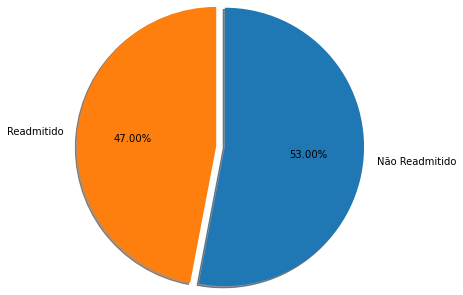

In [24]:
# Vamos visualizar de forma gráfica

# Percentual de cada valor da variável alvo
percentual = round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

# Labels
labels = ['Não Readmitido', 'Readmitido']

# Plot
plt.axis("equal")
plt.pie(percentual , 
        labels = labels,
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.05,0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

Cerca de 47% dos pacientes de diabetes foram readmitidos nos hospitais.

- Recategorização de Variável

**Variável: age**

In [25]:
# Tipo da variável
dados.age.dtype

dtype('O')

In [26]:
# Total de pacientes por faixa etária
dados.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

Text(0, 0.5, 'Count')

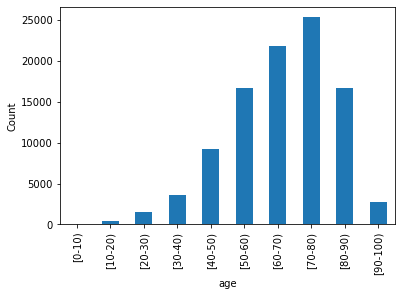

In [27]:
dados.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Podemos perceber que a maioria dos pacientes está na faixa entre 50 e 90 anos. 

Existem diferentes maneiras de lidar com essa variável. O conjunto de dados nos dá a idade apenas como categorias nas faixas de 10 anos, portanto, não sabemos a idade exata de cada paciente. 

Vamos recategorizar a variável, distribuindo os pacientes por um número menor de faixas e manter a variável como categórica. Nesse caso, poderíamos avaliar o risco por faixa etária e não por idade.

In [28]:
# Recategorizamos 'idade' para que a população seja distribuída de maneira mais uniforme

# Classificamos como faixa de 0-50 pacientes de até 50 anos

ate_50 = []
for val in dados['age']:
    if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)']:
        ate_50.append('[0-50)')
    else:
        ate_50.append(val)

dados['age'] = pd.Series(ate_50, index=dados.index)

In [29]:
# Acima de 80 anos ficam na faixa de 80-100
acima_80 = []
for val in dados['age']:
    if val in ['[80-90)','[90-100)']:
        acima_80.append('[80-100)')
    else:
        acima_80.append(val)

dados['age'] = pd.Series(acima_80, index=dados.index)

In [30]:
# Tipo ds variável
dados.age.dtype

dtype('O')

Text(0, 0.5, 'Count')

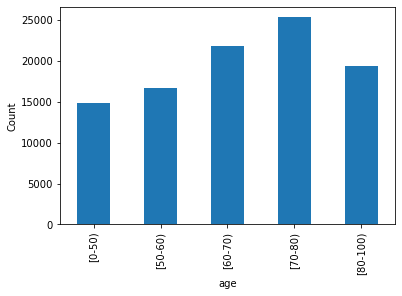

In [31]:
# Vamos verificar a variável que representa a faixa etária dos pacientes
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

### **Recategorização de Variáveis tipo ID**

Uma análise mais detalhada do arquivo IDs_mapping.csv revelará que 'admission_type_id', 'harge_disposition_id' e 'admission_source_id' têm valores com significado semelhante. Eles podem ser mesclados para ter menos valores.

**Variável: admission_type_id**

Identificador inteiro correspondente a 8 valores distintos, por exemplo, "emergência, urgência, eletiva, recém-nascido e não disponível"

In [32]:
dados.admission_type_id.unique()

array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64)

In [33]:
dados.admission_type_id.nunique()

8

In [34]:
# A variável 'admission_type_id' contém 8 níveis
# Reduziremos os níveis de 'admission_type_id' para duas categorias

tipo_id = []
for val in dados['admission_type_id']:
    if val == 1:
        tipo_id.append('Emergencia')
    else:
        tipo_id.append('Outro')
dados['admission_type_id'] = pd.Series(tipo_id, index= dados.index)

In [35]:
dados['admission_type_id'].unique()

array(['Emergencia', 'Outro'], dtype=object)

Variável: **discharge_disposition_id**

identificador inteiro correspondente a 29 valores distintos, por exemplo, "enviado para casa, expirou e não está disponível".

In [36]:
dados.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [37]:
dados.discharge_disposition_id.nunique()

26

In [38]:
# A variável 'discharge_disposition_id' contém 26 níveis
# Reduziremos os níveis de 'discharge_disposition_id' para duas categorias

status_id = []
for val in dados['discharge_disposition_id']:
    if val == 1:
        status_id.append('Casa')
    else:
        status_id.append('Outro')
        
dados['discharge_disposition_id'] = pd.Series(status_id, index = dados.index)


In [39]:
dados.discharge_disposition_id.value_counts()

Casa     57609
Outro    40443
Name: discharge_disposition_id, dtype: int64

Variável: **admission_source_id**

Identificador inteiro correspondente a 17 valores distintos, por exemplo, "encaminhamento médico, e transferência de um hospital".

In [40]:
dados.admission_source_id.unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [41]:
dados.admission_source_id.nunique()

17

In [42]:
# A variável 'admission_source_id' contém 17 níveis, reduzirei os níveis de 'admission_source_id' para três categorias

caminho_id = []
for val in dados['admission_source_id']:
    if val == 7:
        caminho_id.append('Sala_Emergencia')
    elif val == 1:
        caminho_id.append('Recomendacao')
    else:
        caminho_id.append('Outro')
dados['admission_source_id'] = pd.Series(caminho_id, index = dados.index)

In [43]:
dados['admission_source_id'].unique()

array(['Sala_Emergencia', 'Outro', 'Recomendacao'], dtype=object)

In [44]:
dados['admission_source_id'].value_counts()

Sala_Emergencia    55951
Recomendacao       28355
Outro              13746
Name: admission_source_id, dtype: int64

Variáveis **'diag_1', 'diag_2' e 'diag_3'**

O conjunto de dados contém até três diagnósticos para um determinado paciente (primário, secundário e adicional). 


No entanto, cada um deles tem códigos ICD-9 exclusivos e é extremamente difícil incluí-los no modelo e interpretar de forma significativa. 


Portanto, reduziremos esses códigos de diagnóstico para 4 categorias.

Códigos ICD-9 (International Classification of Diseases ou Código Internacional de Doenças):

In [45]:
# Concatena 3 variáveis em um dataframe
diagnostico = dados[['diag_1', 'diag_2', 'diag_3']]

In [46]:
# Vizualiza os dados
diagnostico.head()

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250


In [47]:
diagnostico.isnull().any()

diag_1    False
diag_2    False
diag_3    False
dtype: bool

**Calculando a Comorbidade**

In [48]:
# Vamos aplicar expressões regulares para buscar por um padrão e por isso precisamos do pacote re
import re

In [49]:
# Visualiza os dados
diagnostico.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [50]:
# Função que calcula a Comorbidade
def calcula_comorbidade(row):
    
    # Código 250 indica diabetes
    codigos_doenca_diabetes = "^[2][5][0]"
    
    # Códigos 39x (x = valor entre 0 e 9)
    # Códigos 4zx (z = valor entre 0 e 6 e x = valor entre 0 e 9)
    # Esses códigos indicam problemas circulatórios
    codigos_doenca_circulatorios = "^[3][9][0-9]|^[4][0-5][0-9]"
    
    # Inicializa variável de retorno
    valor = 0
    
    # Valor 0 indica que:
    # Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 0
        
    # Valor 1 indica que:
    # Pelo menos um diagnóstico de diabetes e problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))): 
        valor = 1
        
    # Valor 2 indica que:
    # Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 2
        
    # Valor 3 indica que:
    # Pelo menos um diagnóstico de diabetes e pelo menos um diagnóstico de problemas circulatórios 
    # foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 3 
    
    return valor

In [51]:
dados['comorbidade'] = diagnostico.apply(calcula_comorbidade, axis = 1)

In [52]:
# Shape
dados.shape

(98052, 45)

In [53]:
# Visualiza os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [54]:
# Valores únicos
dados['comorbidade'].unique()

array([1, 3, 2, 0], dtype=int64)

In [55]:
# Valores únicos contagem
dados['comorbidade'].value_counts()

2    39551
0    22645
1    18192
3    17664
Name: comorbidade, dtype: int64

In [56]:
# Calcula o percentual de comorbidade por tipo e por classe da variável alvo
percent_com = pd.crosstab(dados.comorbidade , dados.readmitted , normalize = 'index') * 100
percent_com

readmitted,0,1
comorbidade,,
0,55.526606,44.473394
1,53.875330,46.124670
2,51.748376,48.251624
3,53.753397,46.246603


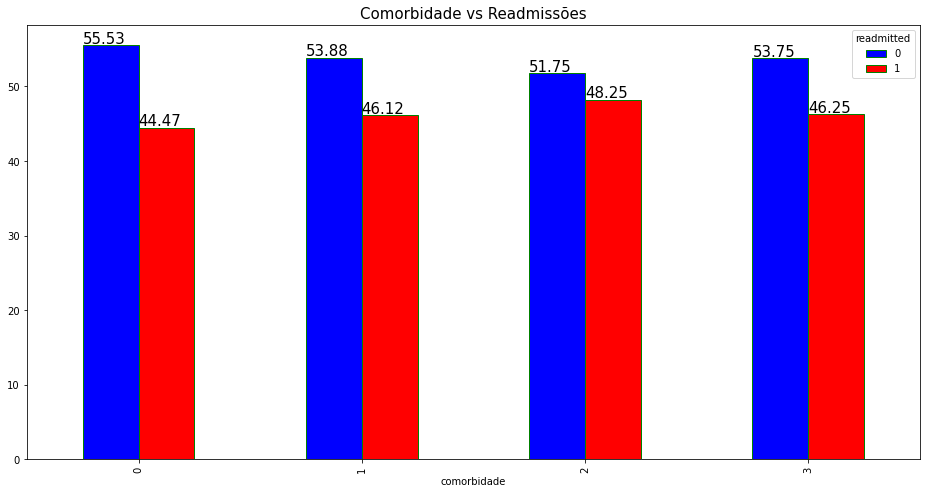

In [57]:
# Plot

# Prepara a figura a partir dos dados
fig = percent_com.plot(kind = 'bar', 
                       figsize = (16, 8), 
                       width = 0.5, 
                       edgecolor = 'g', 
                       color = ['b','r'])

# Desenha cada grupo
for i in fig .patches:
    fig.text(i.get_x() + 0.00, 
             i.get_height() + 0.3, 
             str(round((i.get_height()), 2)), 
             fontsize = 15, 
             color = 'black',
             rotation = 0)

# Título e Print
plt.title("Comorbidade vs Readmissões", fontsize = 15)
plt.show()

In [58]:
# Legenda do gráfico:

# Valor 0 indica que:
# Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente

# Valor 1 indica que:
# Pelo menos um diagnóstico de diabetes E problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 2 indica que:
# Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 3 indica que:
# Pelo menos um diagnóstico de diabetes e pelo menos um dianóstico de problemas circulatórios foram detectados de 
# forma simultânea no paciente

### Variáveis de Dosagem de Medicamentos e Agrupamento de Variáveis

In [59]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


O conjunto de dados contém 23 recursos para 23 medicamentos que indicam, para cada um deles, se uma alteração no medicamento foi feita ou não durante a atual internação do paciente.

Vamos plotar algumas variáveis que indicam uso de medicamento.

Text(0, 0.5, 'Count')

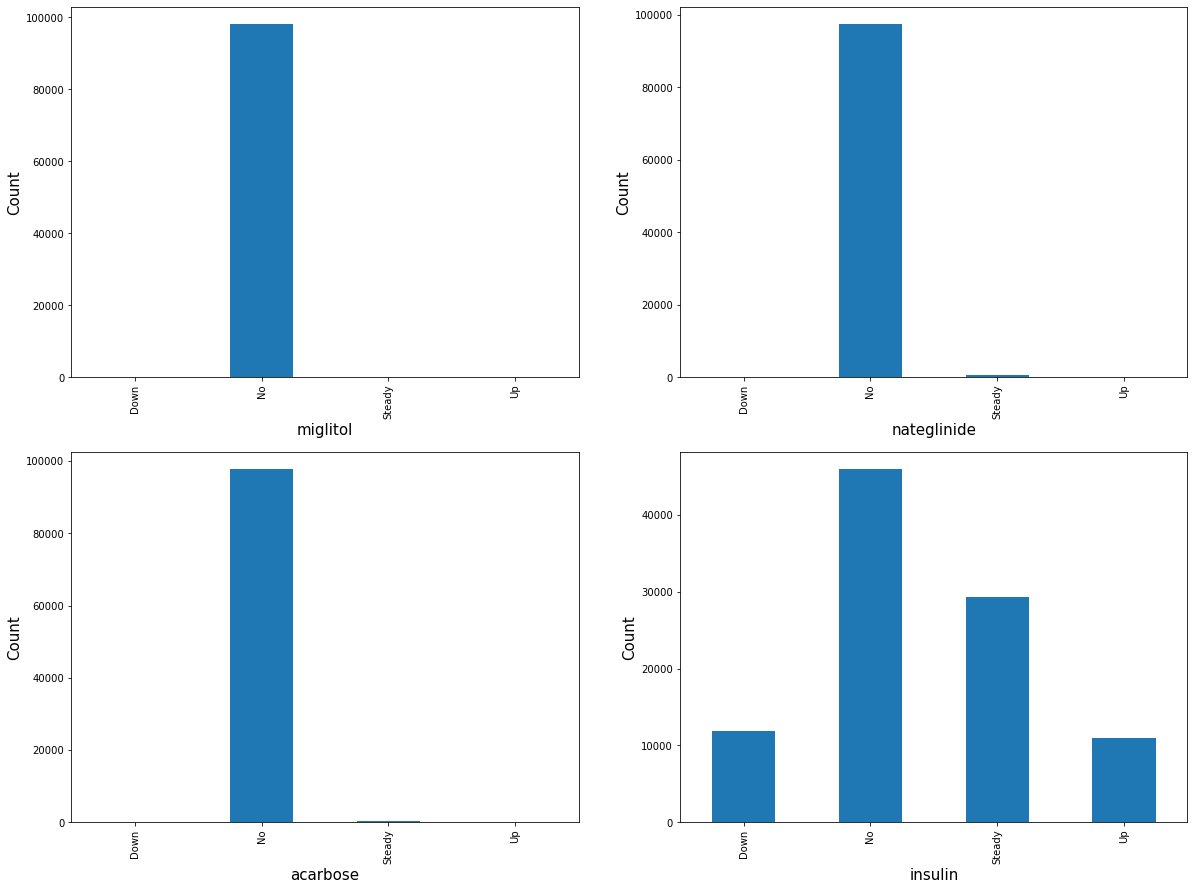

In [60]:
# Plot
fig = plt.figure(figsize = (20,15))

ax1 = fig.add_subplot(221)
ax1 = dados.groupby('miglitol').size().plot(kind = 'bar')
plt.xlabel('miglitol', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax2 = fig.add_subplot(222)
ax2 = dados.groupby('nateglinide').size().plot(kind = 'bar')
plt.xlabel('nateglinide', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax3 = fig.add_subplot(223)
ax3 = dados.groupby('acarbose').size().plot(kind = 'bar')
plt.xlabel('acarbose', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax4 = fig.add_subplot(224)
ax4 = dados.groupby('insulin').size().plot(kind = 'bar')
plt.xlabel('insulin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Podemos contar quantas alterações foram feitas no total para cada paciente e criamos um novo atributo. Isso pode ajudar a descobrir uma relação com o número de alterações, independentemente de qual medicamento foi alterado.

Além disso, podemos criar um novo atributo indicando o total de medicamentos que cada paciente consumiu durante a internação. E então avaliamos se há relação do total com a readmissão.

In [61]:
dados.shape

(98052, 45)

In [62]:
dados.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'comorbidade'],
      dtype='object')

In [63]:
# Lista com os nomes das variáveis de medicamentos (3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [64]:
# Loop para ajustar o valor das variáveis e recategorizando a variável
def apply_logic(x):
    if x == 'No' or x == 'Steady':
        return 0
    else:
        return 1

for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados[colname] = dados[col].apply(apply_logic)

In [65]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Criar uma variável para receber a contagem por paciente
dados['num_alt_dosagem_med'] = 0

In [67]:
# Contagem das modificações da dosagem de medicamentos
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados['num_alt_dosagem_med'] = dados['num_alt_dosagem_med'] + dados[colname]
        del dados[colname]

In [68]:
# Verificando o total de modificações na dosagem de medicamentos
dados['num_alt_dosagem_med'].value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: num_alt_dosagem_med, dtype: int64

Vamos alterar o valor das colunas dos medicamentos para refletir se esse medicamento está sendo administrado a um paciente ou não.

In [69]:
# Recoding das colunas de medicamentos
for col in medicamentos:
    if col in dados.columns:
        dados[col] = dados[col].replace('No', 0)
        dados[col] = dados[col].replace('Steady', 1)
        dados[col] = dados[col].replace('Down', 1)
        dados[col] = dados[col].replace('Up', 1)

In [70]:
dados[col].unique()

array([0, 1], dtype=int64)

Agora, criamos mais uma coluna para ver quantos medicamentos estão sendo administrados a um paciente.


In [71]:
# Variável com a contagem de medicamentos por pacientes
dados['num_med'] = 0

In [72]:
# Carregamos a nova variável 
for col in medicamentos:
    if col in dados.columns:
        dados['num_med'] = dados['num_med'] + dados[col]

In [73]:
# Verificando o total de medicamentos
dados['num_med'].value_counts()

1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: num_med, dtype: int64

Depois de criar essas duas colunas, podemos remover as colunas dos medicamentos.

In [74]:
# Remover coluna de medicamentos
dados = dados.drop(columns = medicamentos)

In [75]:
dados.shape

(98052, 27)

In [76]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,255,9,None,None,Ch,Yes,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,V27,6,None,None,No,Yes,0,1,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,403,7,None,None,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,250,5,None,None,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,250,9,None,None,No,Yes,1,3,0,1


In [77]:
# Variáveis
dados.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                   int64
comorbidade                  int64
num_alt_dosagem_med          int64
num_med                      int64
dtype: object

### **Recoding de variáveis categóricas**

Vamos fazer o recoding de algumas variáveis categóricas.


In [78]:
dados['change'].value_counts()

No    52774
Ch    45278
Name: change, dtype: int64

In [79]:
dados['gender'].value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

In [80]:
dados['diabetesMed'].value_counts()

Yes    75350
No     22702
Name: diabetesMed, dtype: int64

In [81]:
# Recoding de variáveis categóricas binárias
dados['change'] = dados['change'].replace('Ch', 1)
dados['change'] = dados['change'].replace('No', 0)
dados['gender'] = dados['gender'].replace('Male', 1)
dados['gender'] = dados['gender'].replace('Female', 0)
dados['diabetesMed'] = dados['diabetesMed'].replace('Yes', 1)
dados['diabetesMed'] = dados['diabetesMed'].replace('No', 0)

In [82]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,255,9,None,None,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,V27,6,None,None,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,403,7,None,None,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,250,5,None,None,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,250,9,None,None,0,1,1,3,0,1


Também reduziremos o resultado do teste A1C e o resultado do teste sérico de glicose em categorias de Normal, Anormal e Não Testado, com valores 1, 0 e -99, respectivamente.

In [83]:
dados['A1Cresult'].value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [84]:
dados['max_glu_serum'].value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [85]:
# Recoding de variáveis categóricas (Label Encoding)
dados['A1Cresult'] = dados['A1Cresult'].replace('>8', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('>7', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('Norm', 0)
dados['A1Cresult'] = dados['A1Cresult'].replace('None', -99)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>200', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>300', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('Norm', 0)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('None', -99)

In [86]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,255,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,V27,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,403,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,250,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,250,9,-99,-99,0,1,1,3,0,1


-99 Significa que não houve resultado para os exames.

Alguns pacientes no conjunto de dados tiveram mais de um encontro (consulta). 

Não podemos contá-los como encontros independentes, porque isso influencia os resultados para aqueles pacientes que tiveram vários encontros. Assim, tentamos várias técnicas para recolher e consolidar vários encontros para o mesmo paciente, como:

- Considerar a permanência média no hospital em vários encontros.
- Considerar a porcentagem de alterações na medicação em vários encontros.
- Considerar o número total de encontros para substituir o ID exclusivo do encontro.
- Considerar a combinação de diagnósticos em vários encontros como uma lista.

Por fim, o ideal foi deixar apenas um registro de encontro para cada paciente e optamos por manter o primeiro.

In [87]:
# Removendo duplicidade por id de paciente, mantendo o primeiro registro
dados = dados.drop_duplicates(subset = ['patient_nbr'], keep= 'first')

In [88]:
dados.shape

(68629, 27)

In [89]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,255,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,V27,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,403,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,250,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,250,9,-99,-99,0,1,1,3,0,1


## Análise Exploratória

In [90]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68629 entries, 1 to 101765
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient     

#### 1- Total de Medicamentos Consumidos Por Faixa Etária

> A faixa etária de pacientes entre 70-80 é a que mais consome medicamentos.

In [91]:
data = {
    'faixa_etaria': dados['age'],
    'medicamentos_consumidos': dados['num_med']
}
df = pd.DataFrame(data)

# Agrupar e contar a quantidade de medicamentos consumidos por faixa etária
quantidade_por_faixa_etaria = df.groupby(['faixa_etaria'])['medicamentos_consumidos'].sum()

print(quantidade_por_faixa_etaria)

faixa_etaria
[0-50)      11838
[50-60)     14847
[60-70)     19231
[70-80)     20981
[80-100)    14166
Name: medicamentos_consumidos, dtype: int64


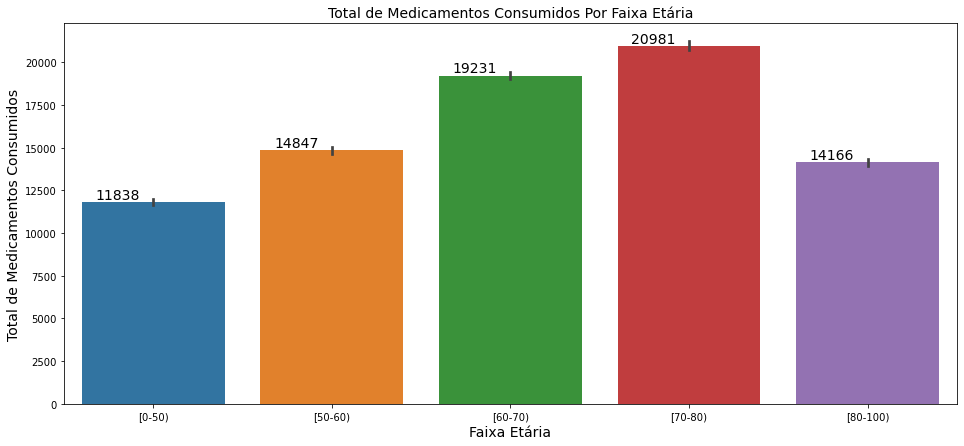

In [92]:
# Tamanho da figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')

# Título
plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

#### 2- Total de Readmissões de Pacientes Diabéticos Por Gênero

> Pacientes do sexo feminino tem número maior de readmissões.

In [93]:
data1 = {
    'sexo': dados['gender'],
    'readmissao': dados['readmitted']
}
df1 = pd.DataFrame(data1)

# Agrupar e contar a quantidade de medicamentos consumidos por faixa etária
readmissao_sexo = df1.groupby(['sexo'])['readmissao'].sum()

print(readmissao_sexo)

sexo
0    15076
1    12674
Name: readmissao, dtype: int64


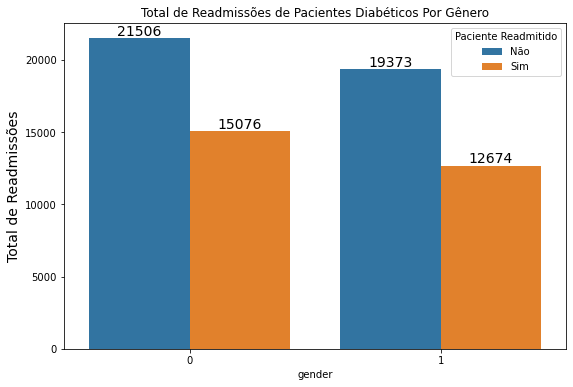

In [94]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x='gender', hue='readmitted', data=dados)


# Tamanho da figura em polegadas
figx.figure.set_size_inches(9,6)

# Legenda
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

#### 3- Total de Readmissões de Pacientes Por Faixa Etária

> A faixa etária de pacientes entre 70-80 é a que tem o maior número de readmissões.

In [95]:
data2 = {
    'idade': dados['age'],
    'readmissao': dados['readmitted']
}
df2 = pd.DataFrame(data2)

# Agrupar e contar a quantidade de medicamentos consumidos por faixa etária
readmissao_idade = df2.groupby(['idade'])['readmissao'].sum()

readmissao_idade

idade
[0-50)      3679
[50-60)     4504
[60-70)     6220
[70-80)     7778
[80-100)    5569
Name: readmissao, dtype: int64

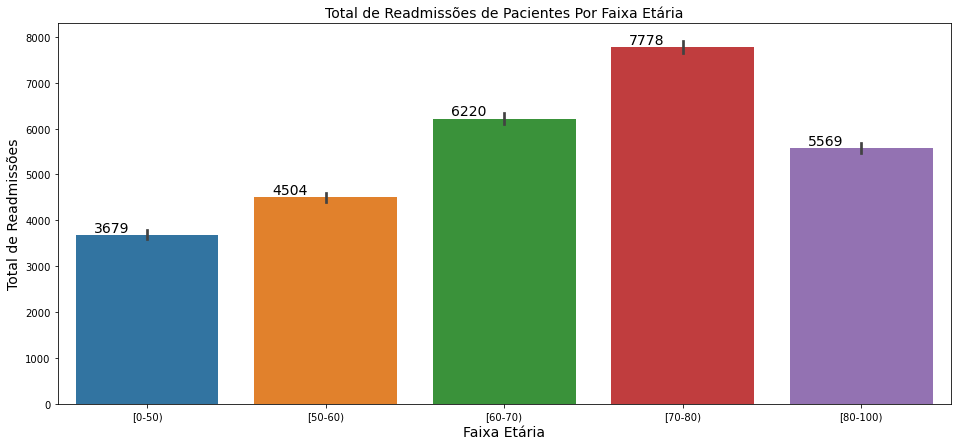

In [96]:
plt.figure(figsize = (16,7))

figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados)

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

#### 4- Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

> A faixa etária de pacientes entre 70-80 tem o maior percentual de readmissões, enquanto a faixa etária de 0-50 anos tem o menor percentual.

In [97]:
# Primeiro calculamos os percentuais
percentual_idade_readmissao = pd.crosstab(dados.age , dados.readmitted, margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


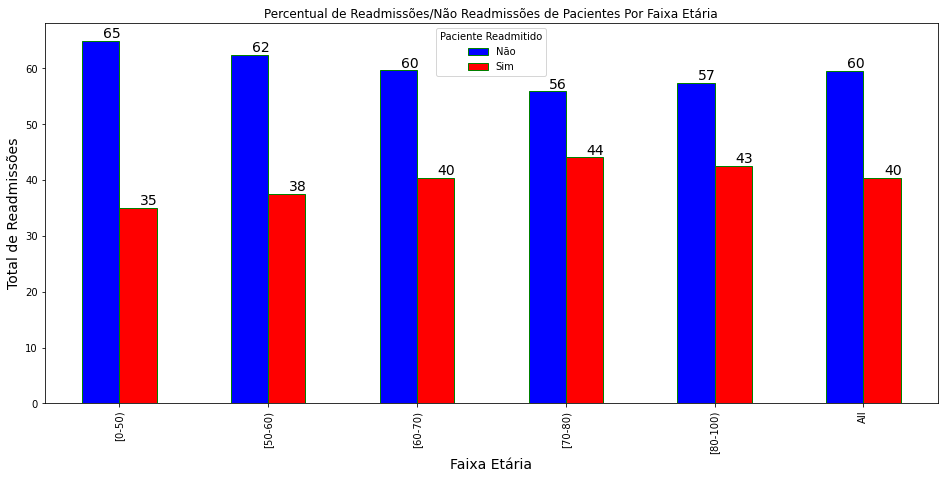

In [98]:
# Cria o gráfico
# Observe que chamamos o plot a partir do dataframe usando nesse caso o Matplotlib
fig = percentual_idade_readmissao.plot(kind = 'bar', 
                                       figsize = (16, 7), 
                                       width = 0.5,
                                       edgecolor = 'g', 
                                       color = ['b', 'r'])

# Legenda
plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária", fontsize = 12)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Mostra o gráfico
plt.show()

#### 5- Total de Readmissões de Pacientes Por Gênero, Por Idade e Por Tipo de Admissão

> Mulheres na faixa etária de 70-80 anos tem um número maior de readmissões por emergência.

In [99]:
data3 = {
    'idade': dados['age'],
    'readmissao': dados['readmitted'],
    'admissao' : dados['admission_type_id'],
    'sexo': dados['gender']
}
df3 = pd.DataFrame(data3)

readmissao_ad_sexo_idade = df3.pivot_table(index=['sexo', 'idade'], columns='admissao', values='readmissao', aggfunc='size', fill_value=0).reset_index().rename(columns={0: 'admissao_0', 1: 'admissao_1'})

readmissao_ad_sexo_idade


admissao,sexo,idade,Emergencia,Outro
0,0,[0-50),2765,2832
1,0,[50-60),2978,2860
2,0,[60-70),3634,3896
3,0,[70-80),4808,4654
4,0,[80-100),4791,3364
5,1,[0-50),2817,2072
6,1,[50-60),3003,3158
7,1,[60-70),3624,4260
8,1,[70-80),3937,4243
9,1,[80-100),2764,2169


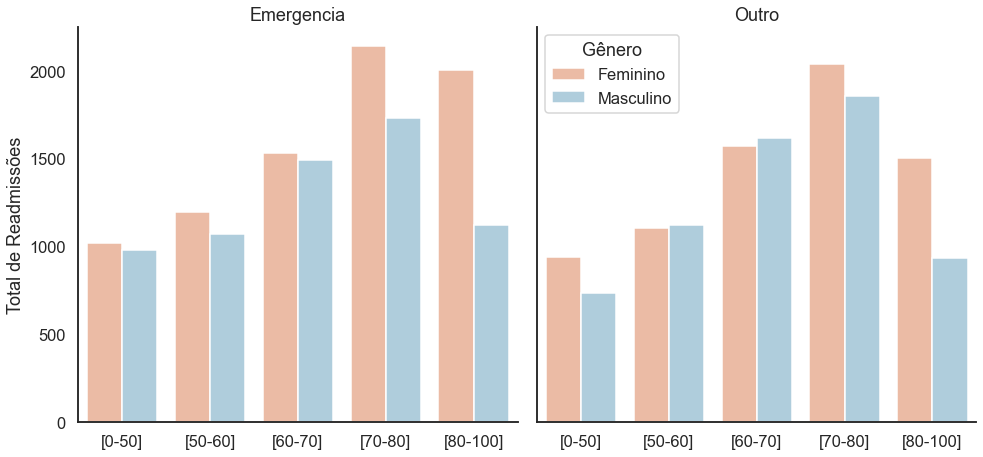

In [100]:
# Vamos incluir o background
sns.set(style = "white", context = "talk")

# Criação do gráfico de barras com catplot
g = sns.catplot(x = 'age', 
                y = 'readmitted', 
                hue = 'gender', 
                col = 'admission_type_id',
                estimator = np.sum, 
                data = dados, 
                palette = "RdBu", 
                kind = "bar",
                height = 7, 
                aspect = 1,
                legend = False,
                ci = None)

# Labels
(g.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper left', labels = ['Feminino', 'Masculino'])

# Mostra o gráfico
plt.show(g)

**6- Total de Readmissões/Não Readmissões Por Gênero e Por Raça**

> Mulheres Caucasianas são a maioria entre as mulheres readmitidas.

In [101]:
data4 = {
    'readmissao': dados['readmitted'],
    'raca' : dados['race'],
    'sexo': dados['gender']
}
df4 = pd.DataFrame(data4)

readmissao_raca_sexo = df4.pivot_table(index=['sexo', 'raca'], columns='readmissao', values='readmissao', aggfunc='size', fill_value=0).reset_index().rename(columns={0: 'admissao_0', 1: 'admissao_1'})
readmissao_raca_sexo

readmissao,sexo,raca,admissao_0,admissao_1
0,0,AfricanAmerican,4693,3018
1,0,Asian,167,77
2,0,Caucasian,15750,11496
3,0,Hispanic,513,284
4,0,Other,383,201
5,1,AfricanAmerican,3063,1891
6,1,Asian,171,70
7,1,Caucasian,15311,10285
8,1,Hispanic,435,245
9,1,Other,393,183


In [102]:
dados['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [103]:
# Cria um dataframe temporário para ajustar o label da variável target para o plot
df_temp = dados

In [104]:
# Faz o mapeamento de 0 e 1 para labels
df_temp["readmitted"] = df_temp["readmitted"].map({0: "Não Readmitido", 1: "Readmitido"})

In [105]:
df_temp['readmitted'].head()

1        Readmitido
2    Não Readmitido
3    Não Readmitido
4    Não Readmitido
5        Readmitido
Name: readmitted, dtype: object

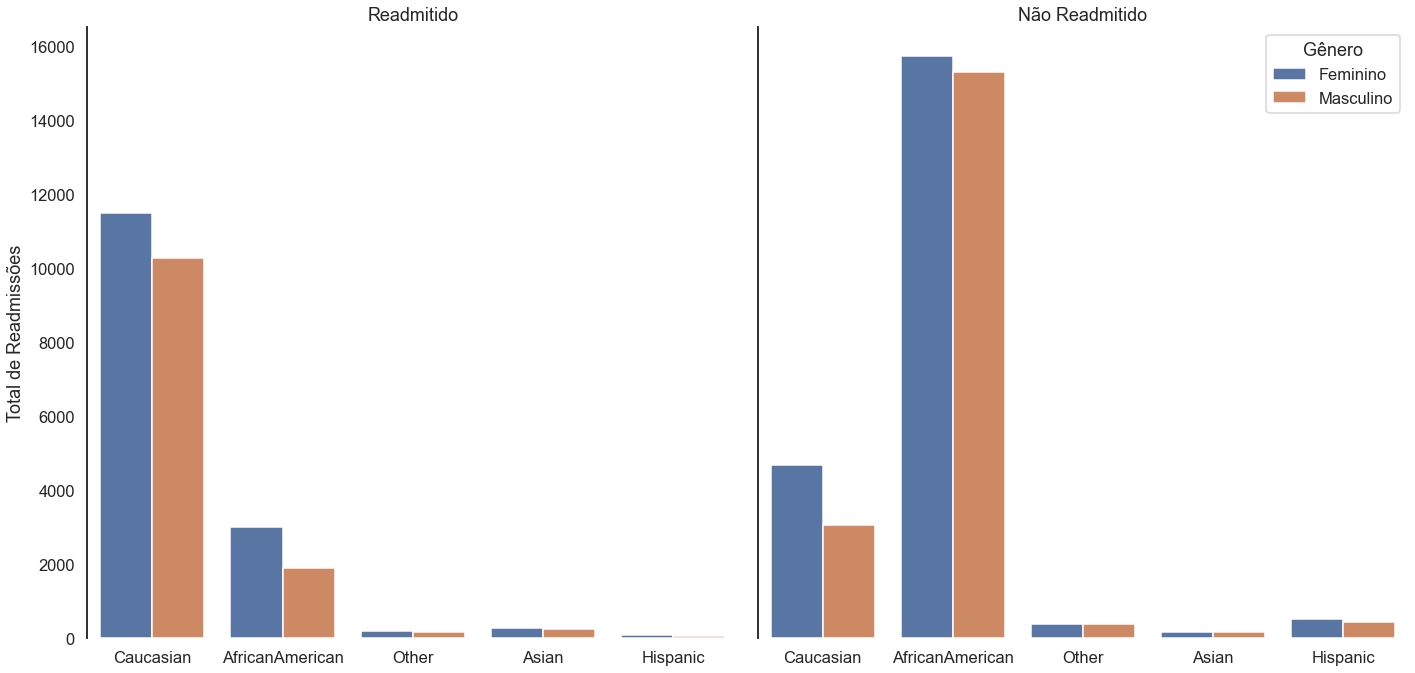

In [106]:
# Remove o background
sns.set(style = "white", context = "talk")

# Cria uma função para personalizar a quantidade de parâmetros
def countplot(x, hue, **kwargs):
    sns.countplot(x = x, hue = hue, **kwargs)

# Cria um facetgrid (usando o dataframe temporário)
grid = sns.FacetGrid(data = df_temp, col = 'readmitted', height = 10, aspect = 1)

# Mapeamento do facetgrid às variáveis
fig = grid.map(countplot, 'race', 'gender', palette = 'deep')

# Labels
(fig.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["Caucasian", "AfricanAmerican", "Other", "Asian", "Hispanic"])
 .set_titles('{col_name}'))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper right', labels = ['Feminino', 'Masculino'])

# Remove os contornos do gráfico
sns.despine(bottom = True)

#### 7- Número de Visitas x Comorbidade

>Pacientes com comorbidade tem o maior número de visitas.

In [107]:
# Criamos a tabela de contigência
num_visitas_comorbidade = pd.crosstab(dados.number_inpatient, dados.comorbidade).sum()
num_visitas_comorbidade

comorbidade
0    15483
1    13032
2    27076
3    13038
dtype: int64

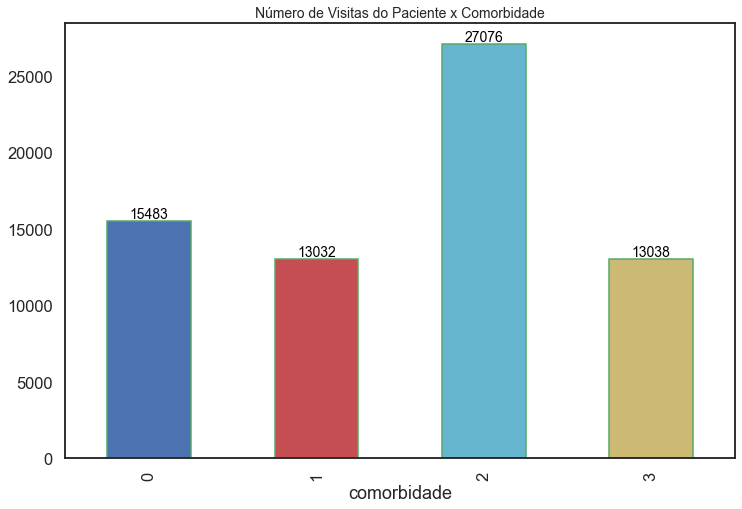

In [108]:
# Vamos remover as linhas do background
sns.set(style = "white", context = "talk")

# Cria o gráfico
fig = num_visitas_comorbidade.plot(kind = 'bar',
                                   figsize = (12,8), 
                                   width = 0.5,
                                   edgecolor = 'g', 
                                   color = ['b','r','c','y'],
                                   rot = 90)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.25, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)

# Mostra o gráfico
plt.show()

#### 8- Proporção de Readmissões Pelo Número de Visitas Antes da Alta

> Quanto mais visitas o paciente recebeu antes da alta, maior foi o volume de readmissões. Ou seja, quanto mais visitas o paciente recebe, maiores as chances de readmissão.

In [109]:
# Tabela de contingência
percent_visitas_readm = pd.crosstab(dados.number_inpatient , dados.readmitted, normalize = 'index') * 100
percent_visitas_readm

readmitted,Não Readmitido,Readmitido
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


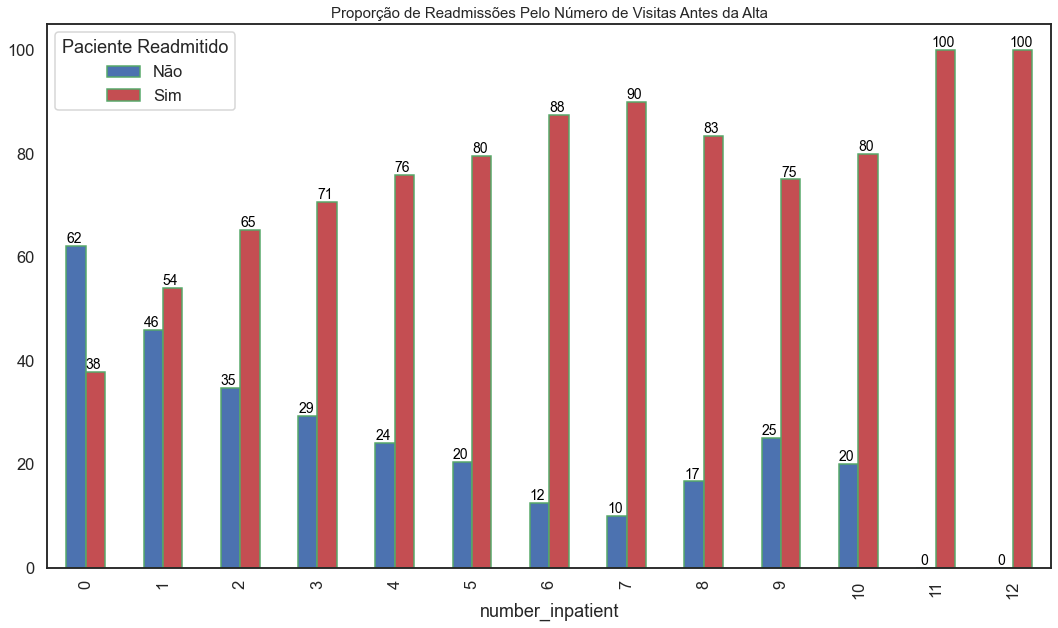

In [110]:
# Cria o gráfico
fig = percent_visitas_readm.plot(kind = 'bar', figsize = (18,10), width = 0.5, edgecolor = 'g', color = ['b','r'])

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.1, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta", fontsize = 15)

# Legenda
fig.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Mostra o gráfico
plt.show()

# FIM